# Análise de vendas de jogos de videogames utilizando agrupamento (K-Means)

Fonte de dados: https://www.kaggle.com/gregorut/videogamesales

In [370]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 


%matplotlib inline

In [371]:
df = pd.read_csv("vgsales.csv")

In [372]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Text(0.5, 1.0, 'Amostras por ano')

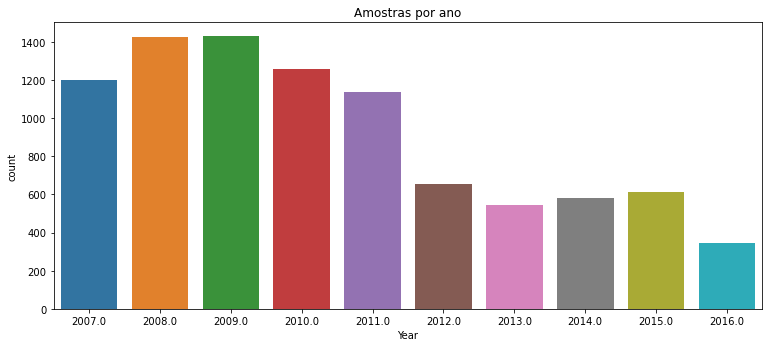

In [373]:
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 5.27)
sns.countplot(x='Year', data=df[(df["Year"] >= 2007) & (df["Year"] <= 2016)])
plt.title("Amostras por ano")

In [374]:
df = df.dropna()
df["Name"] = df["Name"] + " (" + df["Genre"] + ", " + df["Platform"] + ")"

In [375]:
# Filtrando jogos que foram vendidos em todas as regiões entre 2007 e 2010 abaixo de 1 milhão de cópias, exceto Nintendo
df_sales = df[(df["Year"] >= 2007) & (df["Year"] <= 2010) & (df["Publisher"] != "Nintendo")][['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales', 'Name']]
df_sales = df_sales[(df_sales['NA_Sales'] > 0) & (df_sales['EU_Sales'] > 0) & (df_sales['JP_Sales'] > 0) & (df_sales['Global_Sales'] < 1.0)]


In [376]:
# Recuperando o ranking de vendas 
df_sales_genre = df_sales.groupby(["Genre"]).aggregate("sum")[['Global_Sales']].sort_values(['Global_Sales'],ascending=True).head(3)
df_sales = df_sales[df_sales["Genre"].isin(df_sales_genre.index)]
df_sales_genre

,Global_Sales
Genre,
Puzzle,1.08
Adventure,3.02
Misc,3.95


In [377]:
df_sales.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Name
2314,Misc,0.42,0.37,0.01,0.90,"Samba De Amigo (Misc, Wii)"
2535,Misc,0.33,0.25,0.07,0.81,"Patapon (Misc, PSP)"
2714,Adventure,0.27,0.15,0.30,0.76,Ace Attorney Investigations: Miles Edgeworth (...
3045,Adventure,0.33,0.05,0.25,0.67,Phoenix Wright: Ace Attorney - Trials and Trib...
3310,Misc,0.47,0.09,0.01,0.61,"Pac-Man Party (Misc, Wii)"


In [378]:
data_array = df_sales[['NA_Sales', 'EU_Sales', 'JP_Sales']].values

kmeans = KMeans(n_clusters=6, init='k-means++', n_init=100, random_state=101)

Text(0.5, 1.0, 'Vendas por cluster - Puzzle, Adventure, Misc')

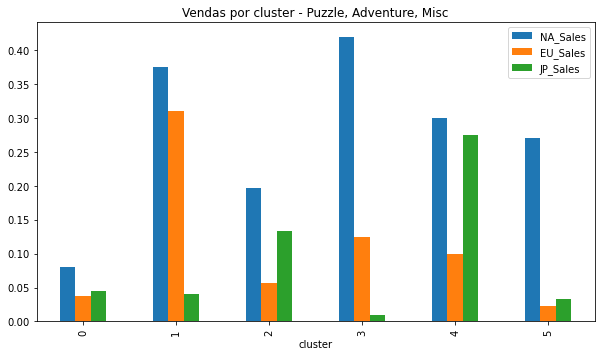

In [379]:
legends = [
    "Vendas mínimas em todas as regiões",
    "Vendeu de forma equivalente em NA e EU e mínima em JP",
    "Vendas médias em todas as regiões",
    "Vendeu muito em NA, médio em EU e minima em JP",
    "Vendeu de forma equivalente em NA e JP e médio em EU",
    "Vendas máximas em NA e minimas em EU e JP"
          ]

df_sales["cluster"] = kmeans.fit_predict(data_array)
grouped = df_sales.groupby(["cluster"]).aggregate("mean")[['NA_Sales', 'EU_Sales', 'JP_Sales']]
grouped.plot.bar(figsize=(10,5.5))
plt.title("Vendas por cluster - " + df_sales_genre.index.str.cat(sep=', '))

,NA_Sales,EU_Sales,JP_Sales,Global_Sales
Name,,,,
"Phoenix Wright: Ace Attorney - Trials and Tribulations (Adventure, DS)",0.33,0.05,0.25,0.67
"Ace Attorney Investigations: Miles Edgeworth (Adventure, DS)",0.27,0.15,0.30,0.76


Text(0.5, 1.0, 'Vendeu de forma equivalente em NA e JP e médio em EU')

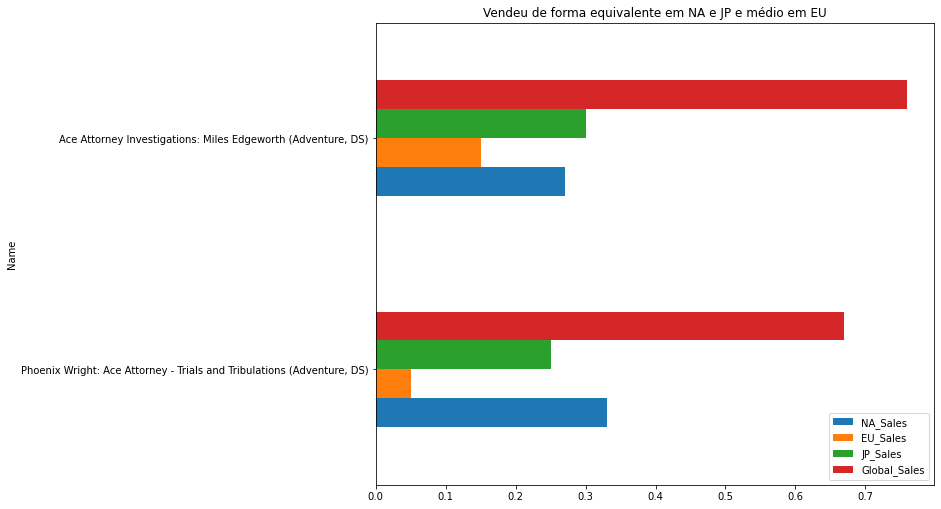

In [382]:
cluster = 4

grouped_cluster = df_sales[(df_sales['cluster'] == cluster)].groupby(["Name"]).aggregate("mean").sort_values(['Global_Sales'],ascending=True)[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']].head(10)

display(grouped_cluster)

grouped_cluster.plot.barh(figsize=(10,8.5))
display(plt.title(legends[cluster]))